In [1]:

import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf


• It has all in all 60K train samples from 10 classes and 10K test samples.
10 classes are digits from 0-9. Labels or classes for all samples in train
and test set is available.
• Visualize 5 samples from each class in the train set in form of images.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


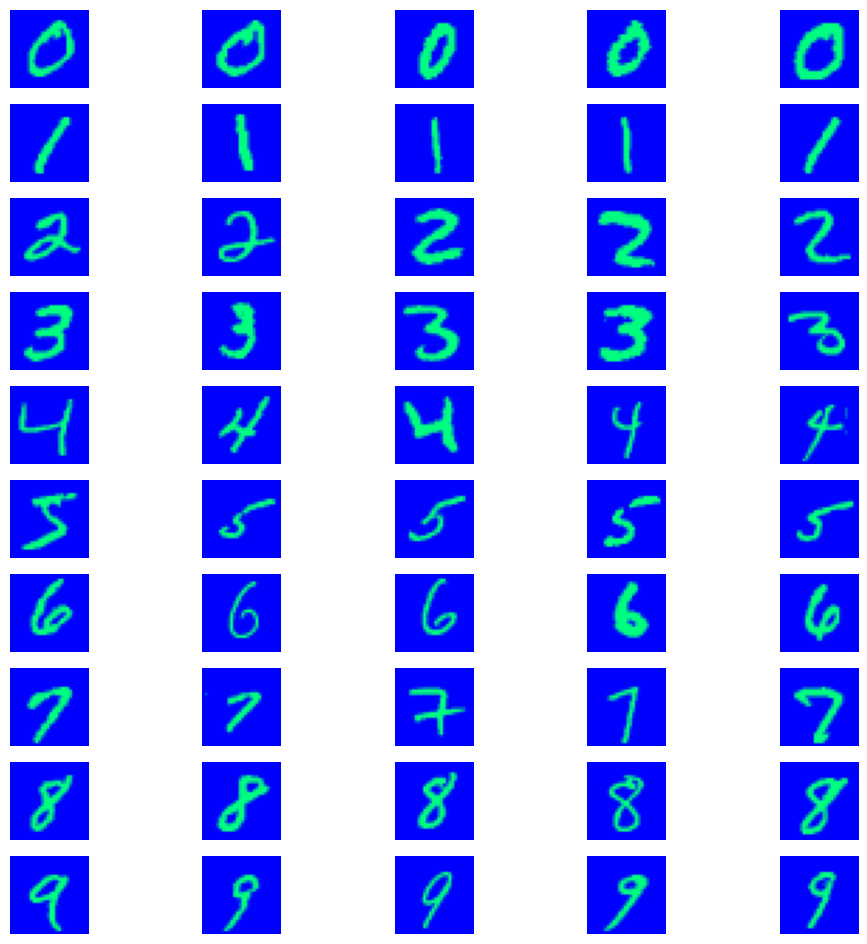

In [2]:
link = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
path = tf.keras.utils.get_file('mnist.npz', link)   
DATASET = np.load(path)
x_train, y_train = DATASET['x_train'], DATASET['y_train']
x_test, y_test = DATASET['x_test'], DATASET['y_test']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

number_of_samples_per_class = 5
fig, axes = plt.subplots(10, number_of_samples_per_class, figsize=(12, 12))
for i in range(10):
    ith_sample =[]
    counter1 = 0
    j = 0 
    while counter1 < number_of_samples_per_class and j<len(x_train): 
        if y_train[j] == i:
            ith_sample.append(x_train[j])
            counter1 += 1
        j+=1
        
    for j in range(number_of_samples_per_class):
        axes[i,j].imshow(ith_sample[j] , cmap = 'winter') 
        axes[i,j].axis('off')
    
plt.show()
        
            

• Images are of size 28×28. Vectorize them to make it 784 dimensional.

In [3]:
x_train_flat = x_train.reshape(x_train.shape[0] , -1) 
x_test_flat = x_test.reshape(x_test.shape[0] ,  -1) 
print(x_train_flat.shape)
print(x_test_flat.shape)



(60000, 784)
(10000, 784)


• Apply QDA on the given dataset. For each of the 10 classes you need to
compute its mean vector and covariance vector. Use the QDA expression
derived in the lecture. Your code should clearly have this expression. Note
mean and covariance will be computed from train set only. Test set is not
seen at this stage.

This is for finding the mean and covariance of each matrix using numpy .

In [4]:
mean_vectors = []
covariance_matrices = []
for i in range(10):
    ith_sample = []
    for j in range(len(x_train_flat)):
        if y_train[j] == i:
            ith_sample.append(x_train_flat[j])
    
    mean_vectors.append(np.mean(ith_sample , axis=0))
    covariance_matrices.append(np.cov(ith_sample , rowvar=False))



# print("{:.16f}".format(mean_vectors[8][-6]))

# for i in range(10):
#     print(mean_vectors[i].shape)
#     print(covariance_matrices[i].shape)
#     print(f'for the class:{i}')
#     print(mean_vectors[i])
#     print(f'for the class:{i}')
#     print(covariance_matrices[i]) 

THIS IS JUST FOR REFERENCE

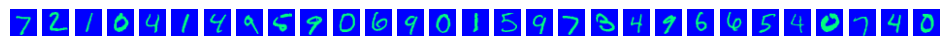

10000


In [5]:


# Print the first 10 images from x_train_flat
number_of_samples_to_print = 29
fig, axes = plt.subplots(1, number_of_samples_to_print, figsize=(12, 2))

for i in range(number_of_samples_to_print):
    axes[i].imshow(x_test_flat[i].reshape(x_test.shape[1:3]), cmap='winter')
    axes[i].axis('off')

plt.show()
print(len(x_test_flat))


The formulae for discriminant function in QDA .

In [6]:
prior_probablities = []
for i in range(10):
    counter1 = 0
    for j in range(len(x_train_flat)):
        if y_train[j] == i:
            counter1 +=1 

    prior_probablities.append(counter1 / 60000)

# for i in range(len(prior_probablities)):
#     print(prior_probablities[i]) 
    

inverse_covariance_matrix_array = []
determinant_covariance_matrix_array = []

for i in range(10):
    
    inverse_covariance_matrix_i = np.linalg.pinv(covariance_matrices[i])
    determinant_covariance_matrix_i = np.linalg.det(covariance_matrices[i])
    inverse_covariance_matrix_array.append(inverse_covariance_matrix_i)
    determinant_covariance_matrix_array.append(determinant_covariance_matrix_i)
    
def discriminant(X , mean_vector , inverse_covariance_matrix,determinant_covariance_matrix  , prior_probablity):
    
    
    discriminant_value = -((np.transpose(X) @ inverse_covariance_matrix) @ X )/2 + (np.transpose(inverse_covariance_matrix @ mean_vector) @ X )  -((np.transpose(mean_vector) @ inverse_covariance_matrix ) @ mean_vector)/2 + np.log(prior_probablity)
    


    return discriminant_value 

def predict_class(X , mean_vectors , covariance_matrices , prior_probablities):
    qda_values = [] 
    for i in range(10):
        qda_values.append(discriminant(X , mean_vectors[i] , inverse_covariance_matrix_array[i] , determinant_covariance_matrix_array[i] , prior_probablities[i]))
    
    predicted_class = np.argmax(qda_values)
    
    return predicted_class

count_correct = 0 
dict_correct_samples = {}
dict_total_samples = {}
for h in range(len(x_test_flat)):
    if y_test[h] in dict_total_samples.keys():
        dict_total_samples[y_test[h]] +=1 
    else:
        dict_total_samples[y_test[h]] = 1
    x_test_sample = x_test_flat[h] 
    predicted_class = predict_class(x_test_sample , mean_vectors , covariance_matrices , prior_probablities) 
    if predicted_class == y_test[h]:
        count_correct += 1 # this is for the total accuracy
        if y_test[h] in dict_correct_samples.keys():
            dict_correct_samples[y_test[h]] +=1 
        else:
            dict_correct_samples[y_test[h]] = 1
    
    
print("THE TOTAL ACCURACY IS: ")
print(str((count_correct/(h+1))*100) + "%")

print("------------------------------------------------------------")
for j in range(10):
    print(f"THE ACCURACY FOR THE CLASS {j} is:")
    if j in dict_total_samples.keys():
        accuracy = (dict_correct_samples.get(j, 0) / dict_total_samples[j]) * 100
        print(str(accuracy) + "%")
    else:
        print("No samples for this class in the training set.")

print("------------------------------------------------------------")


THE TOTAL ACCURACY IS: 
85.72%
------------------------------------------------------------
THE ACCURACY FOR THE CLASS 0 is:
93.46938775510203%
THE ACCURACY FOR THE CLASS 1 is:
67.40088105726872%
THE ACCURACY FOR THE CLASS 2 is:
93.6046511627907%
THE ACCURACY FOR THE CLASS 3 is:
87.52475247524752%
THE ACCURACY FOR THE CLASS 4 is:
90.93686354378818%
THE ACCURACY FOR THE CLASS 5 is:
79.93273542600897%
THE ACCURACY FOR THE CLASS 6 is:
89.03966597077245%
THE ACCURACY FOR THE CLASS 7 is:
86.38132295719845%
THE ACCURACY FOR THE CLASS 8 is:
88.80903490759754%
THE ACCURACY FOR THE CLASS 9 is:
82.1605550049554%
------------------------------------------------------------


QUESTION-2 starts from here

In [7]:

def create_dataset(x_train, y_train ,number_of_samples_per_class = 100 ):
    dataset = []
    y_train_dataset = []
    for i in range(10):
        ith_sample = []
        y_train_sample =[]
        counter = 0 
        j =0 
        while counter < number_of_samples_per_class and j<len(x_train):
            if y_train[j] == i:
                y_train_dataset.append(i)
                ith_sample.append(x_train[j].flatten())
                y_train_sample.append(y_train[j])
                counter +=1
            j+=1
        dataset.extend(ith_sample)
        # print(y_train_sample)
        # print(counter)
    return np.array(dataset).T , y_train_dataset

X , y_train_new = create_dataset(x_train , y_train, number_of_samples_per_class=100)
print(X.shape)





(784, 1000)


REMOVING THE MEAN

In [8]:
# Calculate the mean along each feature dimension
mean_X = np.mean(X, axis=1, keepdims=True)
print(mean_X.shape)
# Remove the mean from X
X_centered = X - mean_X

# Print the shape of the centered dataset
print("Shape of the centered dataset:", X_centered.shape)


(784, 1)
Shape of the centered dataset: (784, 1000)


In [13]:
S = (X @ np.transpose(X))/999
print(S.shape)

eigenvalues, eigenvectors = np.linalg.eig(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

U = eigenvectors
# print("Eigenvalues:", eigenvalues)
# print("Shape of U:", U.shape)

In [10]:
Y = np.transpose(U) @ X_centered
Y_MSE = np.transpose(U) @ X_centered 
# print(Y.shape)

X_recom = U @ Y_MSE + mean_X
# print(X_recom.shape)

def find_MSE(X , X_recom):
    ans = 0 
    for i in range(len(X)):
        for j in range(len(X[i])):
            ans += (X[i][j] - X_recom[i][j])**2
            
    return ans 

print("This is the value of MSE " +str(find_MSE(X, X_recom)))

This is the value of MSE 1.6756878939731394e-16


Now we are choosing the first p columns of the U matrix

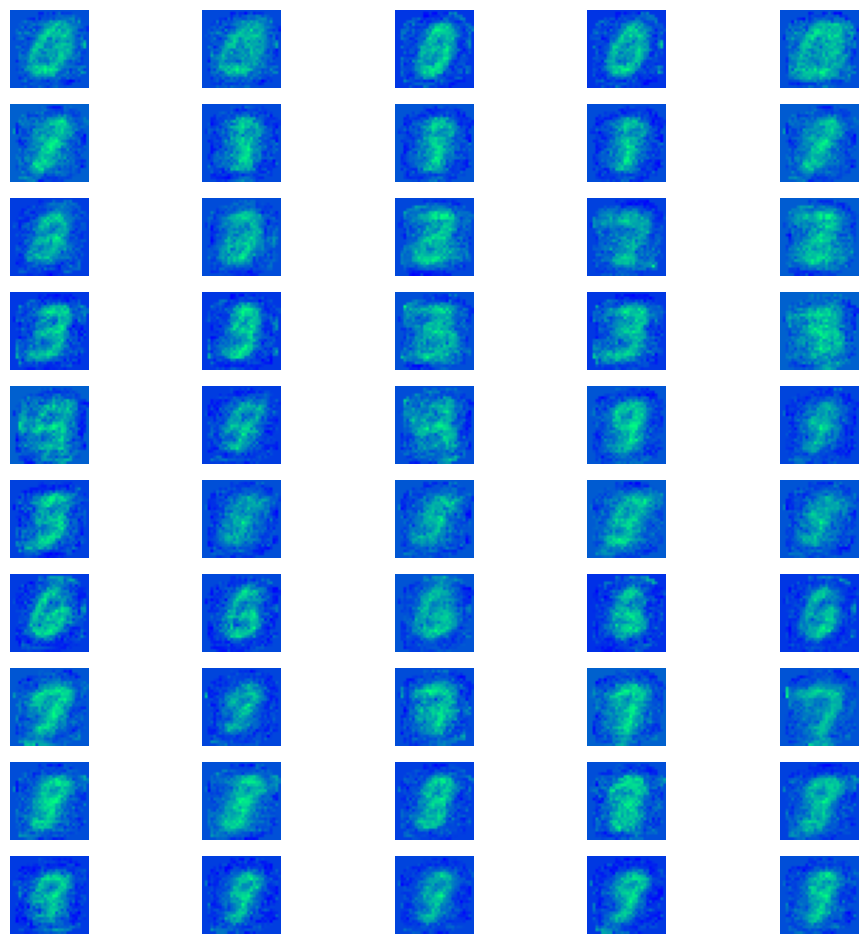

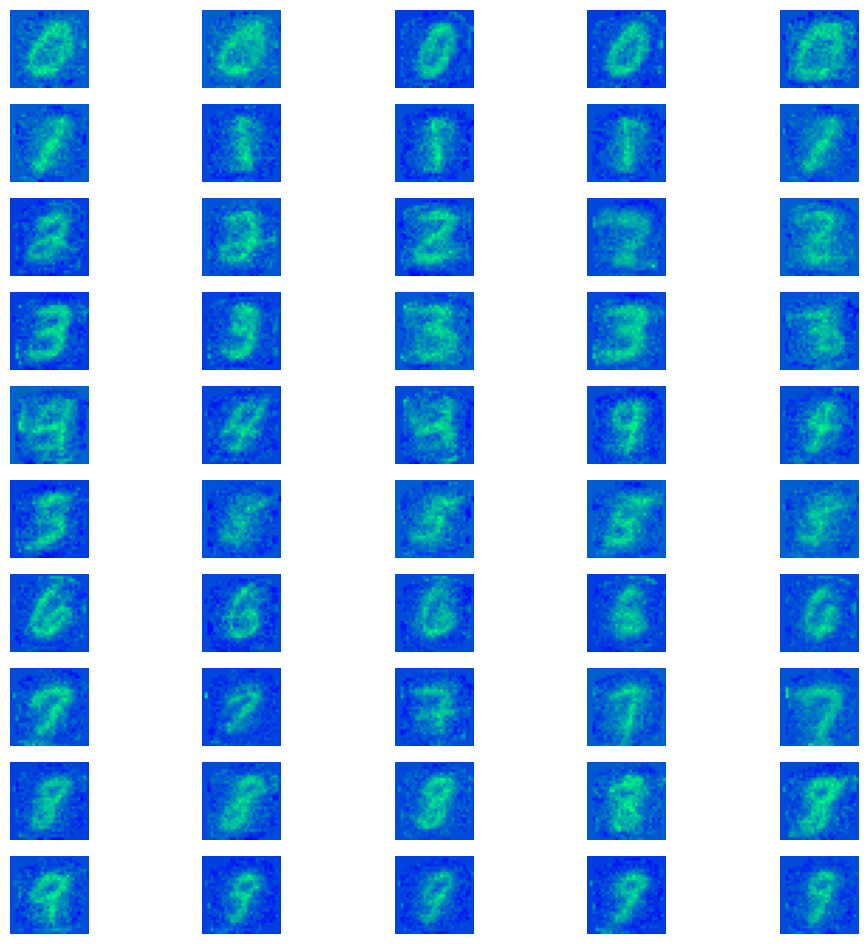

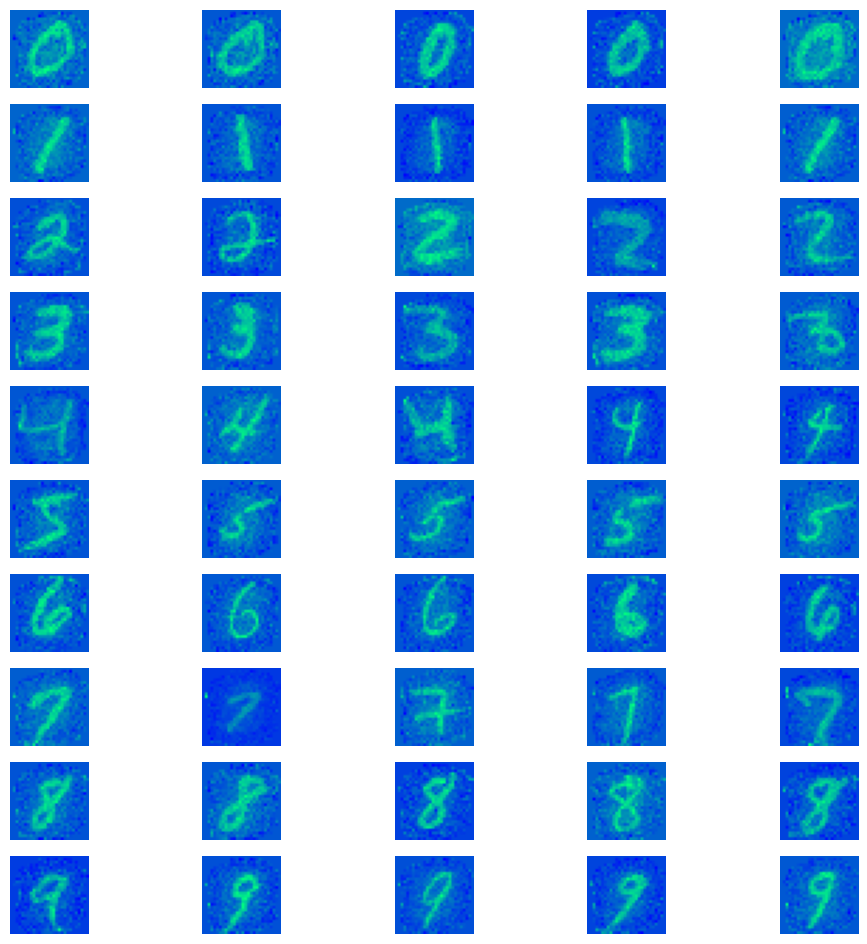

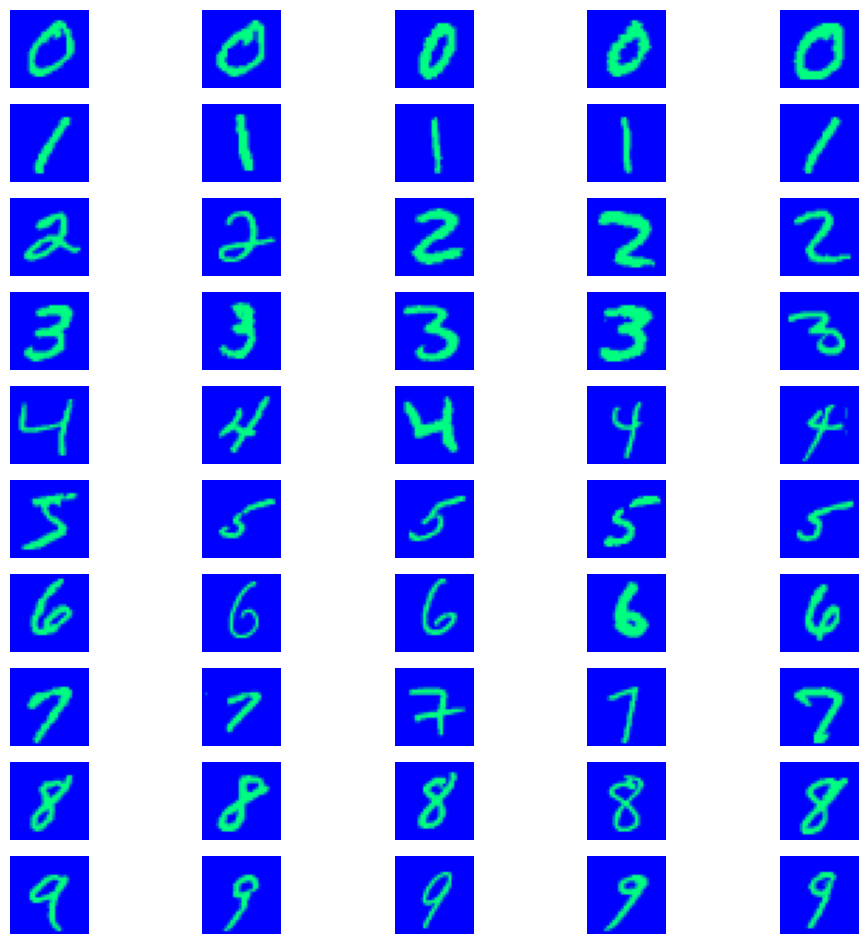

In [11]:
values_of_p = [50,100,500 ,784]
for p in values_of_p:

    Y = np.transpose(U[:, :p]) @ X_centered
    # print(Y.shape)
    X_reconstructed = U[:, :p] @ Y
    # print(X.shape)
    X_reconstructed = X_reconstructed + mean_X 
    # print(X.shape)
    X_reconstructed = X_reconstructed.T
    # print(X_reconstructed.shape)
    reconstructed_images = X_reconstructed.reshape((-1, 28, 28))
    # print(reconstructed_images.shape)
    
    number_of_samples_per_class = 5
    fig, axes = plt.subplots(10, number_of_samples_per_class, figsize=(12, 12))
    for i in range(10):
        ith_sample =[]
        counter1 = 0
        j = 0 
        while counter1 < number_of_samples_per_class and j<len(reconstructed_images): 
            if y_train_new[j] == i:
                ith_sample.append(reconstructed_images[j])
                counter1 += 1
                # print(y_train_new[j])
            j+=1
        for j in range(number_of_samples_per_class):
            axes[i,j].imshow(ith_sample[j] , cmap = 'winter') 
            axes[i,j].axis('off')


Let test set be Xtest. Find Y = (Up^T)(Xtest). For each value of p find Y , and
apply QDA from Q1 on Y. Obtain accuracy on test set as well as per class
accuracy. As p inreases, accuracy shall increase.

RECOMPUTING PCA PROJECTED SAMPLES

In [12]:
p_values = [5,10,20]
X , y_train_new= create_dataset(x_train , y_train , number_of_samples_per_class = 6000)
mean_X = np.mean(X , axis=1 ,keepdims=True) 
X_centered = X - mean_X 
S = (X @ np.transpose(X))/59999
# print(S.shape)

eigenvalues, eigenvectors = np.linalg.eig(S)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

U = eigenvectors

X = X.T
X_centered = X_centered.T
mean_X = mean_X.T
# print(X.shape , X_centered.shape , mean_X.shape)
U = eigenvectors
for p_value in p_values:
    print("FOR VALUE OF P:" + str(p_value))
    correct_values = [0,0,0,0,0,0,0,0,0,0] 
    total_values = [0,0,0,0,0,0,0,0,0,0] 
    # print(p_value)
    Up_train = U[:, :p_value]
    # print(U.shape)
    Y_train = np.dot(X_centered , Up_train)
    # print(Y_train.shape)
    # print(len(Y_train))
    # print(len(y_train_new))
    mean_p_vlaue = []
    covariance_matrices_p_value = []
    inverse_covariance_matrix_array_p_value =[]
    determinant_covariance_matrix_array_p_value = []
    for i in range(10):
        ith_sample = []
        j=0
        while j < len(Y_train):
            if y_train_new[j] == i:
                ith_sample.append(Y_train[j])
            j += 1
        # print(ith_sample)
        mean_p_vlaue.append(np.mean(ith_sample , axis=0))
        covariance_matrices_p_value.append(np.cov(ith_sample , rowvar=False))

        determinant_covariance_matrix_array_p_value.append(np.linalg.det(np.cov(ith_sample , rowvar=False)))
  
    for i in range(10):
        inverse_covariance_matrix_array_p_value.append(np.linalg.inv(covariance_matrices_p_value[i] + 0.000001 * np.identity(covariance_matrices_p_value[i].shape[0])))
    # print(inverse_covariance_matrix_array_p_value[0].shape)
    S_TEST = np.cov(x_test_flat, rowvar=False)
    
    # print(S_TEST.shape)
    eigenvalues_TEST, eigenvectors_TEST = np.linalg.eig(S_TEST)
    sorted_indices_TEST = np.argsort(eigenvalues_TEST)[::-1]
    eigenvalues_TESST = eigenvalues_TEST[sorted_indices_TEST]
    eigenvectors_TEST = eigenvectors_TEST[:, sorted_indices_TEST]
    
    U_TEST = eigenvectors
    
    Y_TEST = np.dot((x_test_flat - mean_X) , U_TEST[: , :p_value])
    
    def predict_class_p_mean(X):
        qda_values = [] 
        for i in range(10):
            qda_values.append(discriminant(X , mean_p_vlaue[i] , inverse_covariance_matrix_array_p_value[i] , determinant_covariance_matrix_array_p_value[i] , prior_probablities[i]))
        
        predicted_class = np.argmax(qda_values)
        
        return predicted_class
    
    count_accuracy = 0
    for k in range(len(Y_TEST)):
        class_ans = predict_class_p_mean(Y_TEST[k])
        if class_ans == y_test[k]:
            count_accuracy +=1
            correct_values[class_ans] += 1
        total_values[y_test[k]] +=1
    
    for i in range(10):
        print(f"Accuracy of class {i} is :" + str((correct_values[i]/total_values[i])*100) + "%")    
        
    print("THE TOTAL ACCURACY IS: " + str(count_accuracy / 100) + "%")
    
        
            
    
    
        
        
    

FOR VALUE OF P:5
Accuracy of class 0 is :70.40816326530613%
Accuracy of class 1 is :69.69162995594714%
Accuracy of class 2 is :71.60852713178295%
Accuracy of class 3 is :56.63366336633663%
Accuracy of class 4 is :62.016293279022406%
Accuracy of class 5 is :39.125560538116595%
Accuracy of class 6 is :75.05219206680584%
Accuracy of class 7 is :71.10894941634241%
Accuracy of class 8 is :40.965092402464066%
Accuracy of class 9 is :62.636273538156594%
THE TOTAL ACCURACY IS: 62.31%
FOR VALUE OF P:10
Accuracy of class 0 is :85.91836734693878%
Accuracy of class 1 is :62.11453744493392%
Accuracy of class 2 is :85.27131782945736%
Accuracy of class 3 is :73.86138613861387%
Accuracy of class 4 is :67.10794297352342%
Accuracy of class 5 is :77.80269058295964%
Accuracy of class 6 is :79.64509394572025%
Accuracy of class 7 is :84.43579766536965%
Accuracy of class 8 is :53.38809034907598%
Accuracy of class 9 is :73.73637264618435%
THE TOTAL ACCURACY IS: 74.21%
FOR VALUE OF P:20
Accuracy of class 0 is 